In [1]:
import pandas as pd
from sklearn import tree
import graphviz

In [2]:
train_csv = pd.read_csv('/root/kaggle/train.csv')

In [3]:
train1 = train_csv.drop(['Cabin','Ticket','Name','Embarked'], axis=1)

In [4]:
train1.dropna(axis=0,inplace=True)

In [5]:
train1['Sex'] = train1['Sex'].replace(['male','female'],[0,1])

In [6]:
train1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500
6,7,0,1,0,54.0,0,0,51.8625
7,8,0,3,0,2.0,3,1,21.0750
8,9,1,3,1,27.0,0,2,11.1333
9,10,1,2,1,14.0,1,0,30.0708
10,11,1,3,1,4.0,1,1,16.7000


In [7]:
tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=15, min_samples_leaf=8)
col = ['Pclass','Sex','Age','SibSp','Parch','Fare']
X_DT=train1[col]
Y_DT=train1['Survived']

In [8]:
X_DT

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
6,1,0,54.0,0,0,51.8625
7,3,0,2.0,3,1,21.0750
8,3,1,27.0,0,2,11.1333
9,2,1,14.0,1,0,30.0708
10,3,1,4.0,1,1,16.7000


In [9]:
Y_DT

0      0
1      1
2      1
3      1
4      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
18     0
20     0
21     1
22     1
23     1
24     0
25     1
27     0
30     0
33     0
34     0
35     0
37     0
38     0
      ..
856    1
857    1
858    1
860    0
861    0
862    1
864    0
865    1
866    1
867    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [10]:
tree1.fit(X_DT, Y_DT)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=8,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [11]:
tree1_view = tree.export_graphviz(tree1, out_file=None, feature_names = X_DT.columns.values, rotate=True) 
tree1viz = graphviz.Source(tree1_view)

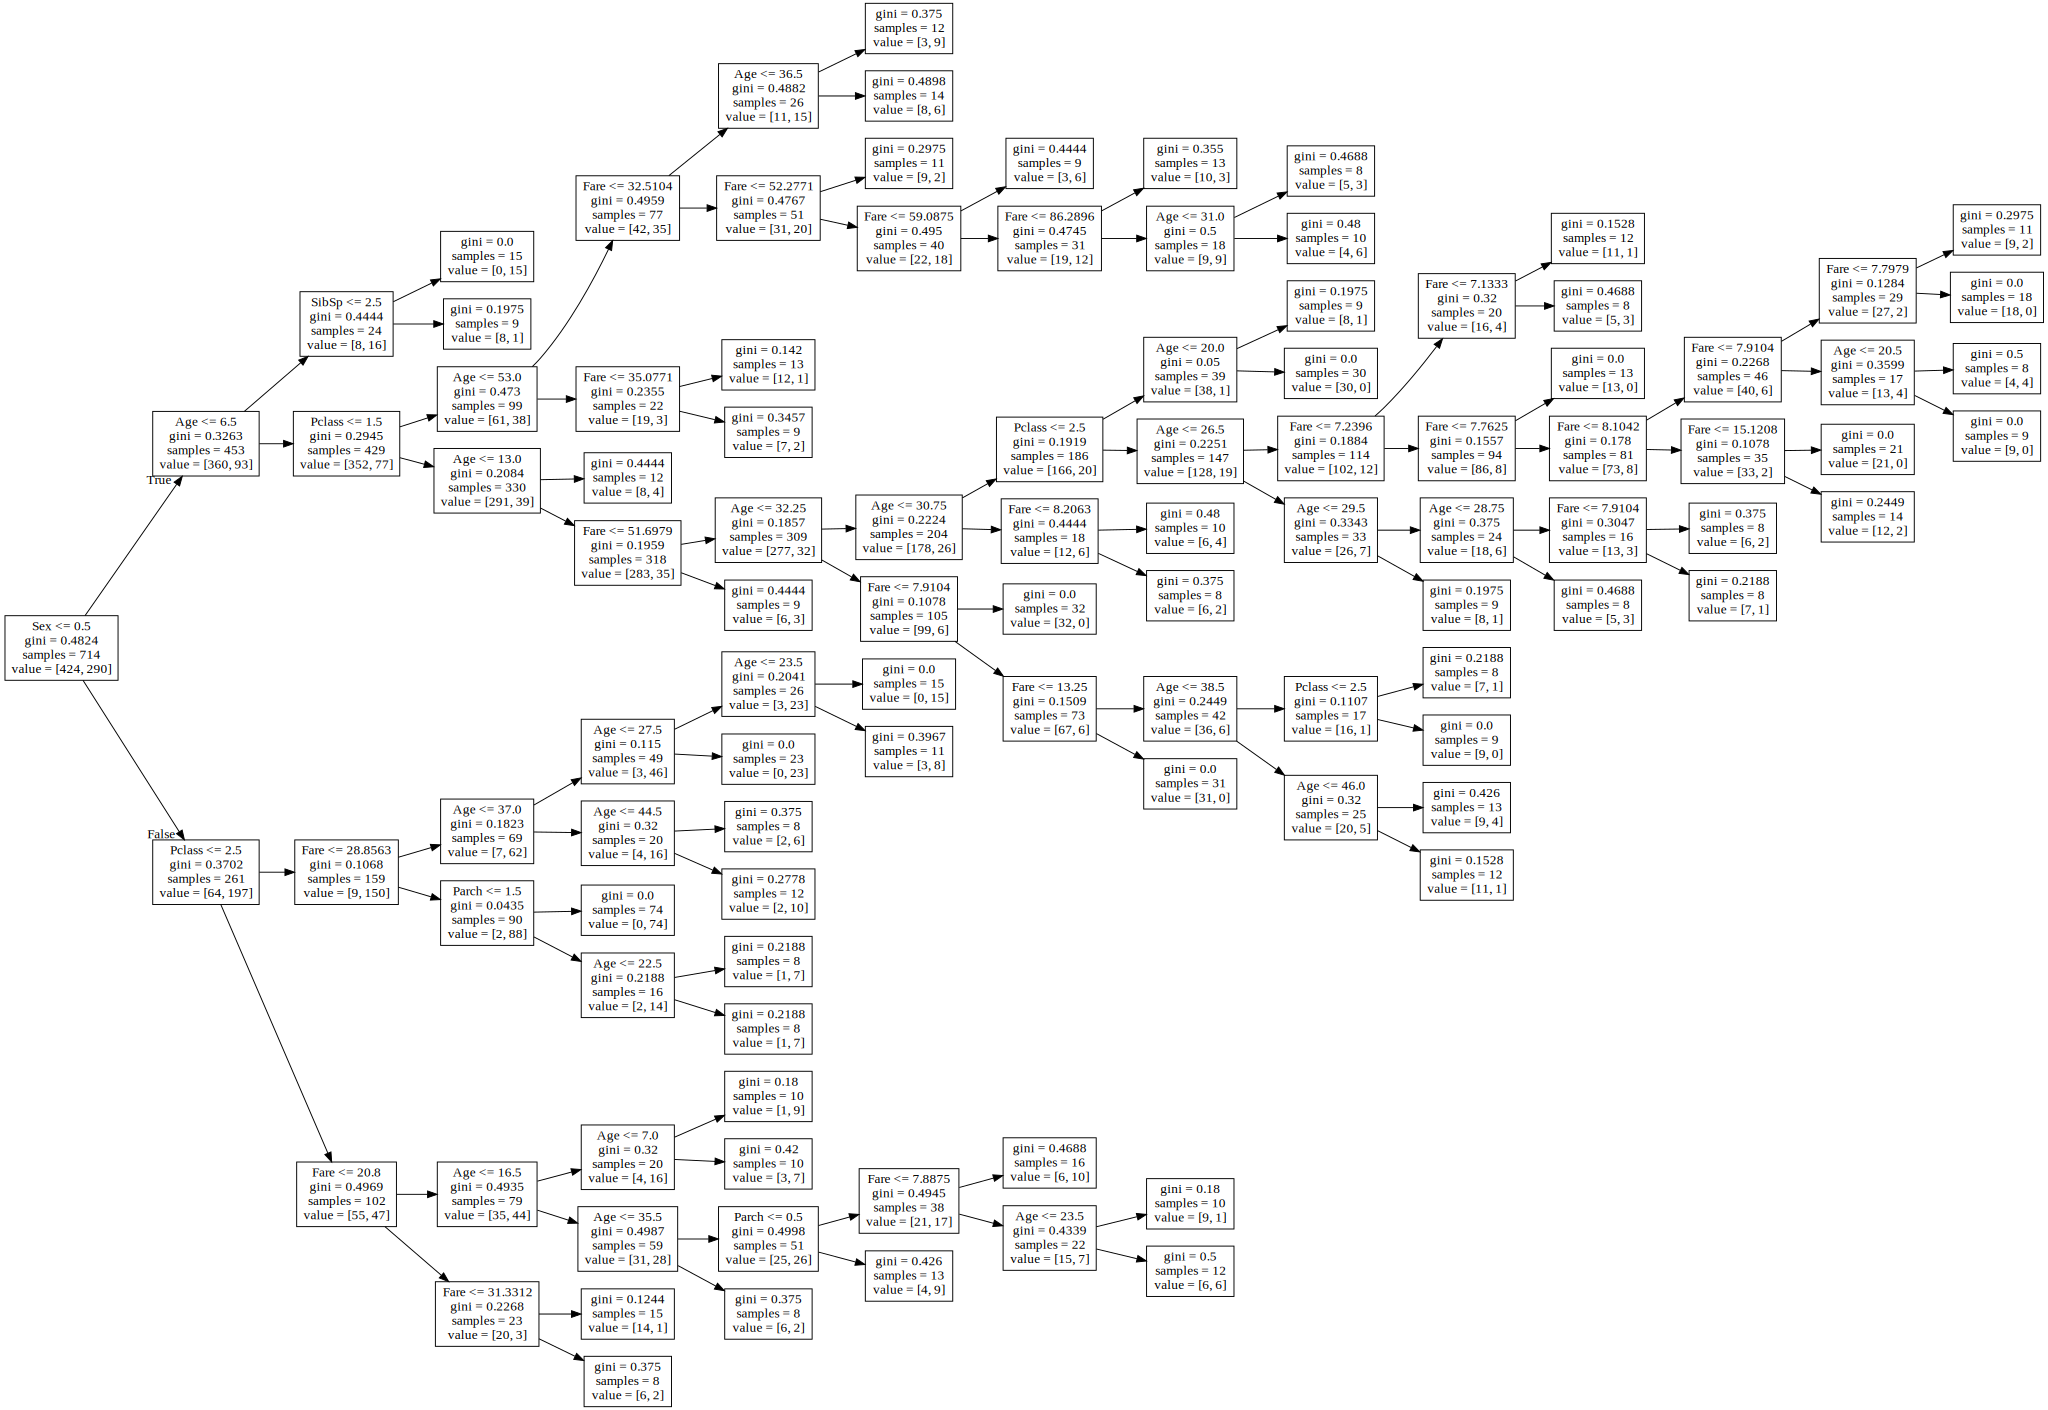

In [12]:
tree1viz

In [13]:
test_csv = pd.read_csv('/root/kaggle/test.csv')

In [14]:
test = test_csv.drop(['Cabin','Ticket','Name','Embarked'], axis=1)

In [15]:
test['Sex'] = test['Sex'].replace(['male','female'],[0,1])

In [16]:
Age_mean = train1['Age'].mean()

In [17]:
test = test.fillna(Age_mean)

In [18]:
test[col]

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.500000,0,0,7.8292
1,3,1,47.000000,1,0,7.0000
2,2,0,62.000000,0,0,9.6875
3,3,0,27.000000,0,0,8.6625
4,3,1,22.000000,1,1,12.2875
5,3,0,14.000000,0,0,9.2250
6,3,1,30.000000,0,0,7.6292
7,2,0,26.000000,1,1,29.0000
8,3,1,18.000000,0,0,7.2292
9,3,0,21.000000,2,0,24.1500


In [19]:
Answer = tree1.predict(test[col])

In [20]:
submission = pd.DataFrame()
submission['PassengerId'] = test.PassengerId
submission['Survived'] = pd.Series(Answer)

In [21]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [22]:
print('Score: {}'.format(tree1.score(X_DT, Y_DT)))

Score: 0.857142857143


In [23]:
submission.to_csv("/root/kaggle/Kaggle_Tianic_Answer.csv", index=False)